## Package imports

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.covariance import EmpiricalCovariance
from scipy.spatial.distance import mahalanobis
import warnings
warnings.filterwarnings("ignore")

## Get the Vertebral Column Data Set

In [6]:
ver_data = pd.read_csv('./data/vertebral_column_data/column_2C.dat', delimiter='\s+', header=None)
ver_data.head()

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [7]:
print(f"Shape for the given dataset is :{ver_data.shape}")

Shape for the given dataset is :(310, 7)


## Change the column names

In [8]:
ver_data.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis','class']
ver_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


To get the count of NO and AB in this dataset

In [9]:
ver_data['class'].value_counts()

class
AB    210
NO    100
Name: count, dtype: int64

In [10]:
ver_data['class'] = ver_data['class'].map({'NO':0, 'AB':1})
ver_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [11]:
features = ver_data.iloc[:,:-1]
target = ver_data.iloc[:,-1]

## Scatterplots of the given features

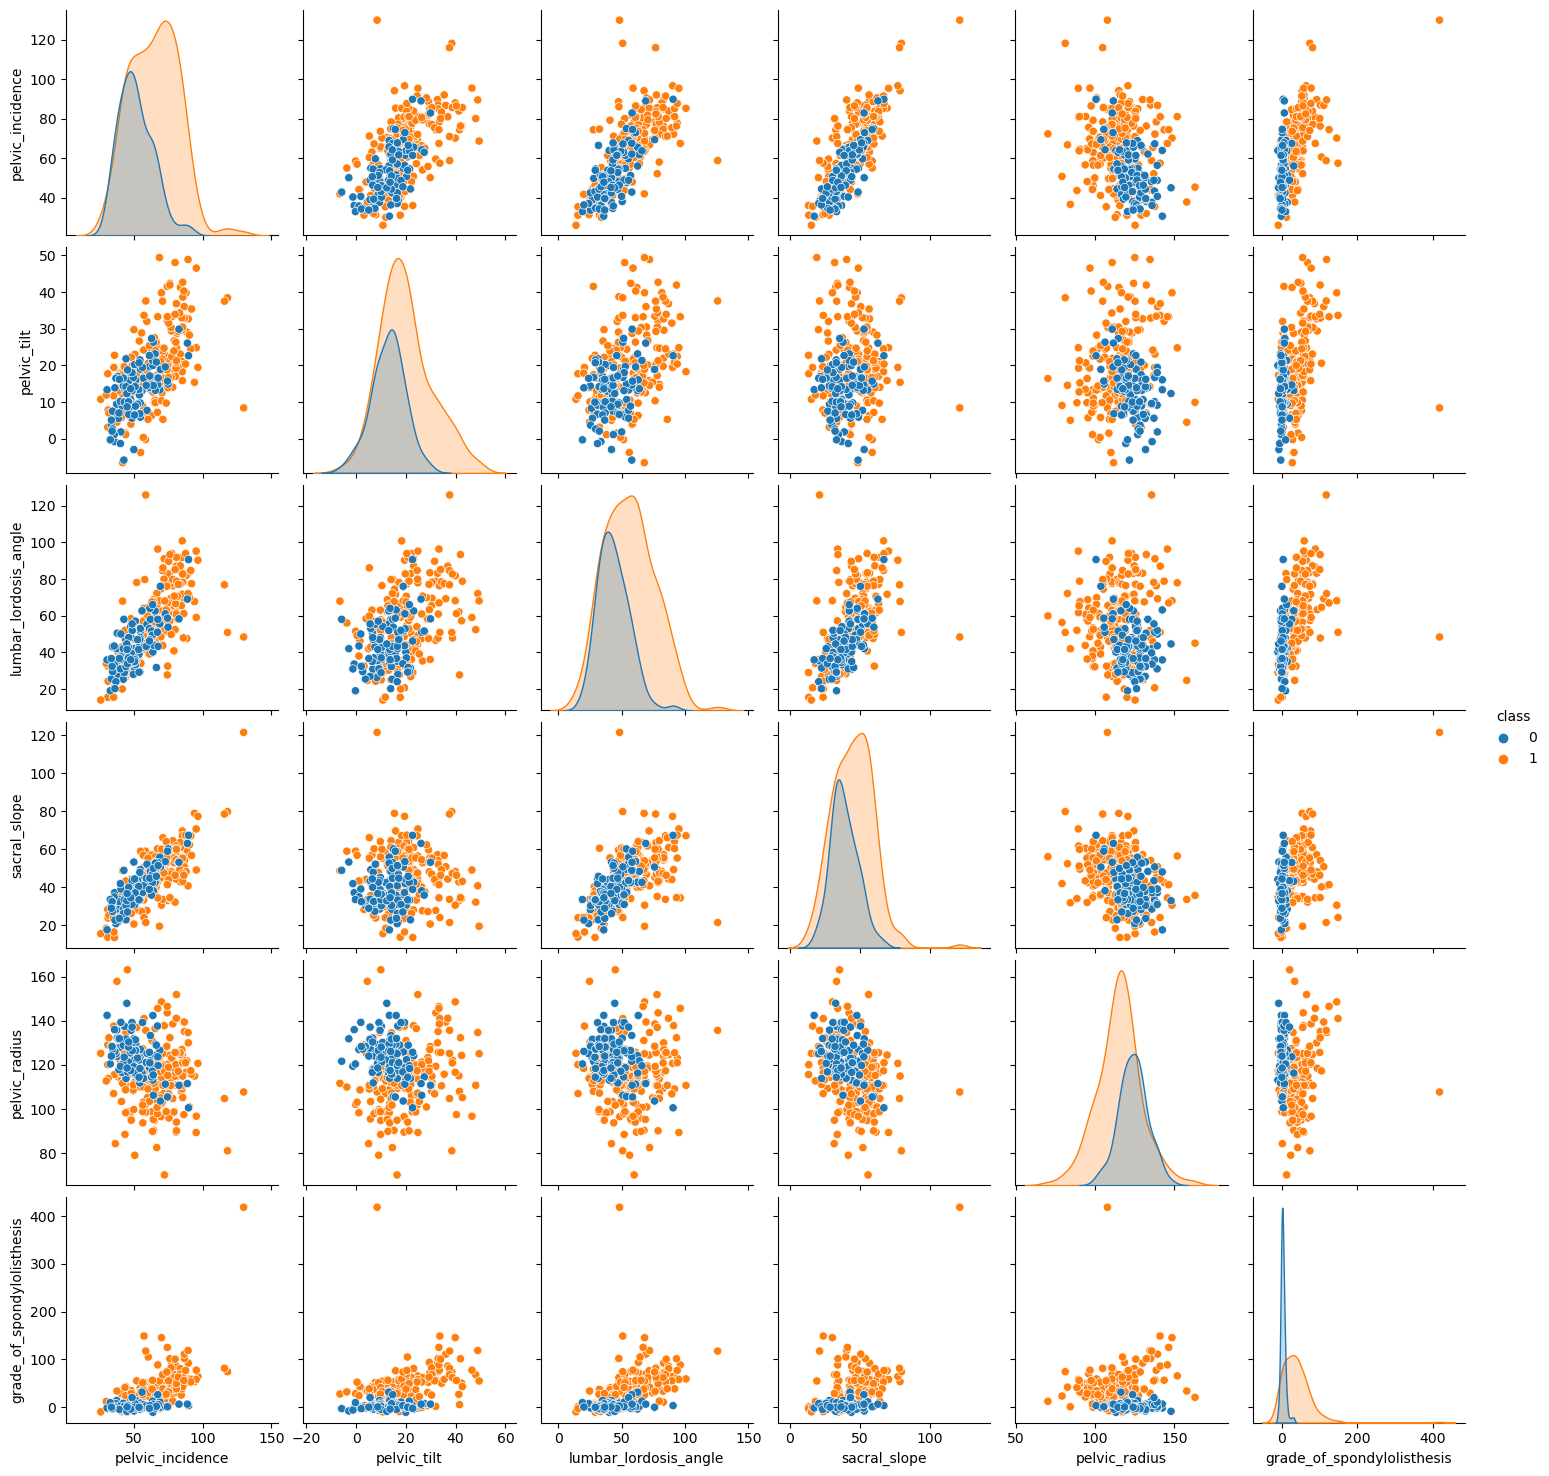

In [13]:
sns.pairplot(ver_data, hue = 'class')
plt.show()

## Boxplots of the given features

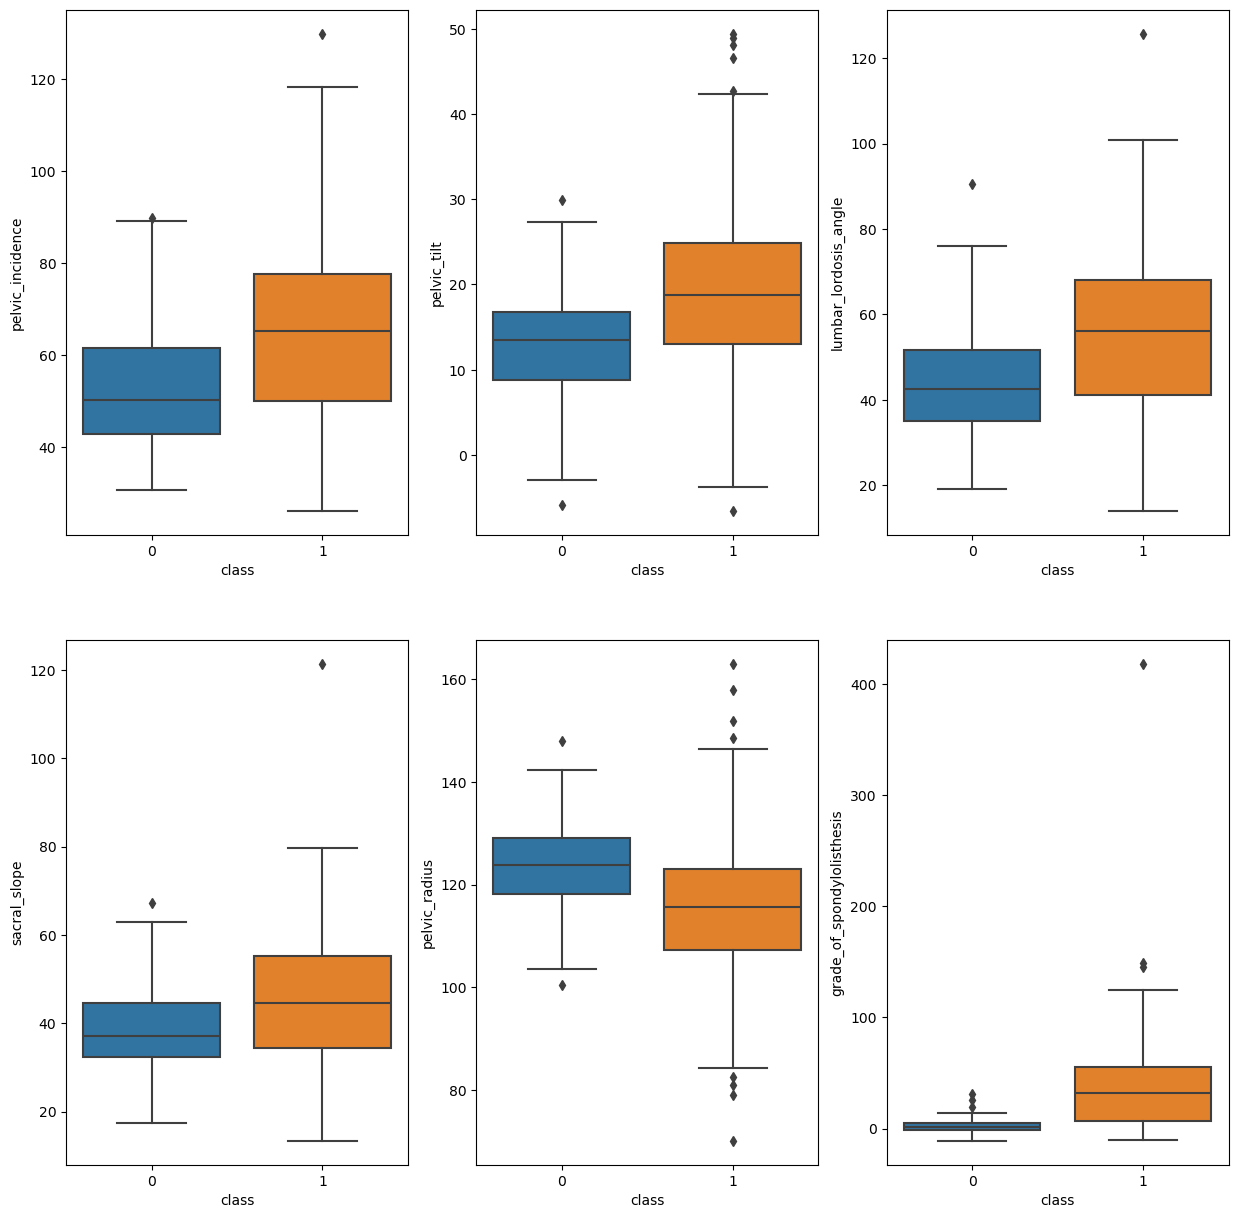

In [14]:
fig, axes = plt.subplots(2,3, figsize=(15,15))

sns.boxplot(ax = axes[0][0], data = ver_data, x='class', y='pelvic_incidence' )
sns.boxplot(ax = axes[0][1], data = ver_data, x='class', y='pelvic_tilt' )
sns.boxplot(ax = axes[0][2], data = ver_data, x='class', y='lumbar_lordosis_angle' )
sns.boxplot(ax = axes[1][0], data = ver_data, x='class', y='sacral_slope' )
sns.boxplot(ax = axes[1][1], data = ver_data, x='class', y='pelvic_radius' )
sns.boxplot(ax = axes[1][2], data = ver_data, x='class', y='grade_of_spondylolisthesis' )

plt.show()

## Split Data Set

In [15]:
data_class0 = ver_data[ver_data['class']==0]
data_class1 = ver_data[ver_data['class']==1]
train_set = pd.concat([data_class0[:70],data_class1[:140]],axis=0)
test_set = pd.concat([data_class0[70:],data_class1[140:]])

train_set.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0


In [16]:
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

## Classification

### Using Eucledian Metric

In [17]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

# train_distance_matrix = pairwise_distances(X_train)
# test_distance_matrix = pairwise_distances(X_test,X_train)


# def knn_classifier(distance_matrix, target, k):
#     label_by_model = []
#     for i in range(len(distance_matrix)):
#         data_distances = distance_matrix[i, :]             #This will fetch me the distances of all the feature points for this data
#         nearest_n = np.argsort(data_distances)[:k]         #This will give me the k nearest neighbours of the data input
#         labels_k_n = target[nearest_n]                    #This will return the classes of the nearest data inputs
#         value = np.bincount(labels_k_n).argmax()           #This will return the majority among the predictions of the nearest labels
#         label_by_model.append(value)
#     return np.array(label_by_model)

k_list = list(range(10,1,-1))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # for Training Data
    predict_label_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, predict_label_train)
    train_error = 1-train_accuracy
    
    # forTesting Data
    predict_label_test = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, predict_label_test)
    test_error = 1-test_accuracy
    print(f"Training Error at k = {k} is {train_error} \t Testing Error at k = {k} is {test_error:.2f}")

Training Error at k = 10 is 0.1333333333333333 	 Testing Error at k = 10 is 0.10
Training Error at k = 9 is 0.1428571428571429 	 Testing Error at k = 9 is 0.13
Training Error at k = 8 is 0.1333333333333333 	 Testing Error at k = 8 is 0.08
Training Error at k = 7 is 0.1428571428571429 	 Testing Error at k = 7 is 0.12
Training Error at k = 6 is 0.14761904761904765 	 Testing Error at k = 6 is 0.08
Training Error at k = 5 is 0.14761904761904765 	 Testing Error at k = 5 is 0.10
Training Error at k = 4 is 0.1428571428571429 	 Testing Error at k = 4 is 0.06
Training Error at k = 3 is 0.10476190476190472 	 Testing Error at k = 3 is 0.08
Training Error at k = 2 is 0.11428571428571432 	 Testing Error at k = 2 is 0.10


Test Error Rate is 0.06
k best value is 4


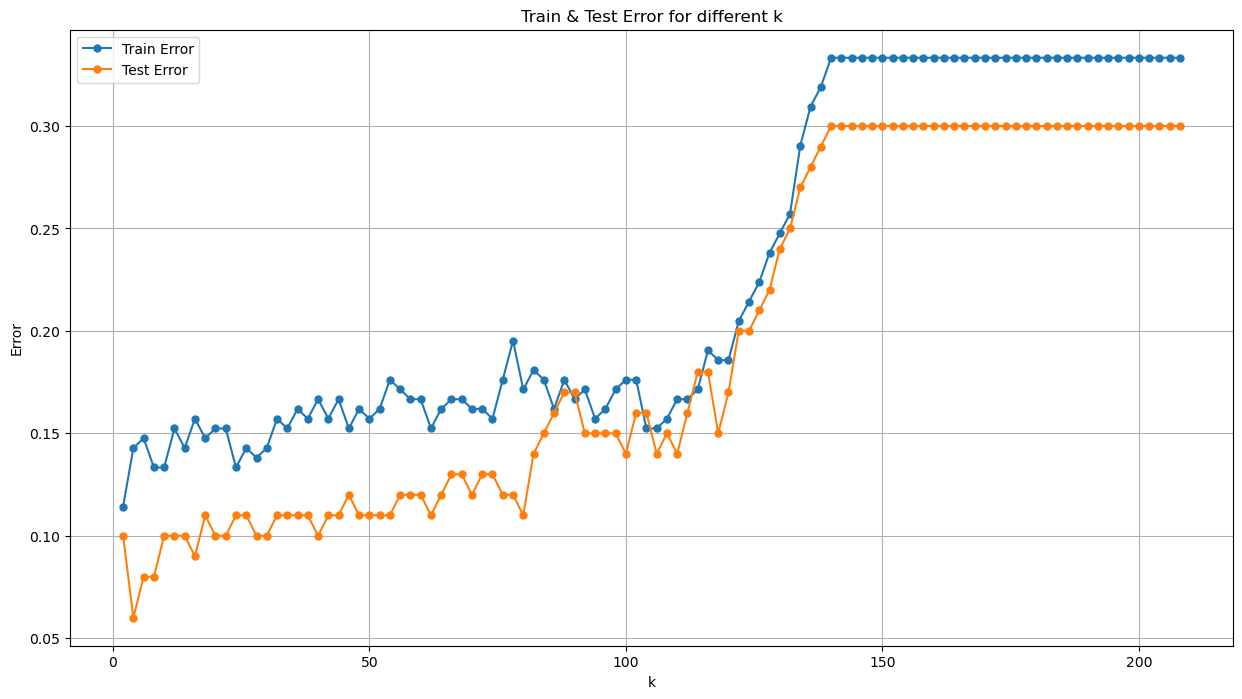

In [18]:
k_list = list(range(208,0,-2))
train_error = []
test_error = []
error = 1
k_best = 0
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    #for training data
    predict_label_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, predict_label_train)
    train_err = 1-train_accuracy
    train_error.append(train_err)

    #for testing data
    predict_label_test = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, predict_label_test)
    test_err = 1-test_accuracy
    test_error.append(test_err)
    if test_err<error:
        k_best = k
        error = test_err

print(f"Test Error Rate is {error:.2f}")
print(f"k best value is {k_best}")

plt.figure(figsize=(15,8))
plt.plot(k_list, train_error, label="Train Error", linestyle = '-', marker = 'o', markersize = 5)
plt.plot(k_list, test_error, label="Test Error", linestyle = '-', marker = 'o', markersize = 5)
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Train & Test Error for different k")
plt.grid(True)
plt.legend()
plt.show()

In [19]:
overlap = train_set.merge(test_set, how='inner')
if not overlap.empty:
    print("Data Leakage")

#Since I felt strange that how test error is lesser than the train error, I used OpenAI to understand the graph and found out
#that since the data might be noisy that is the reason why this is happening, I want to confirm if there was any data leakage
#so took help from Open AI

## Confusion Matrix

In [21]:
k = k_best
knn_conf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_conf.fit(X_train, y_train)
y_pred = knn_conf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix :\n{conf_matrix}")

Confusion Matrix :
[[25  5]
 [ 1 69]]


## True Positive Rate(Recall), True Negative Rate, Precision, F1-score when k = 4

In [22]:
conf_matrix = conf_matrix.ravel()
tp = conf_matrix[3]
fn = conf_matrix[2]
fp = conf_matrix[1]
tn = conf_matrix[0]
precision =  tp / (tp + fp)
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = 2 * (precision * tp_rate) / (precision + tp_rate)

print(f"Precison: {precision:.3f}\nRecall (TPR): {tp_rate:.3f}\nSensitivity (TNR): {tn_rate:.3f}\nF1-Score: {f1:.3f}")

Precison: 0.932
Recall (TPR): 0.986
Sensitivity (TNR): 0.833
F1-Score: 0.958


<b>Answer - k at the value of k=4 is giving the best results.</b>

## Learning Curve

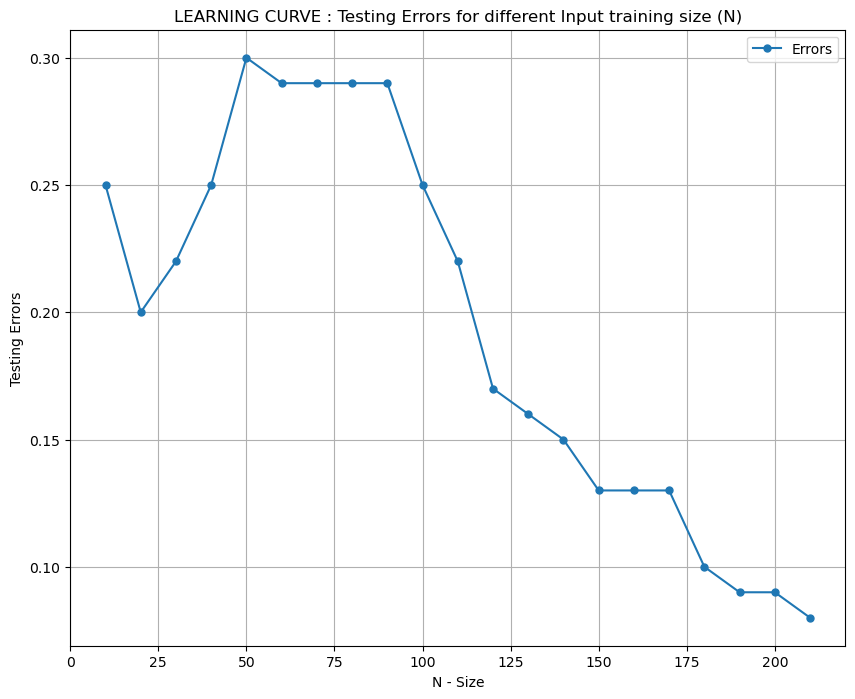

In [23]:
def split_data_set(data):
    n = list(range(10,211,10))
    errors_n_list = []
    for i in n:
        data_class0 = data[data['class']==0].reset_index(drop=True)
        data_class1 = data[data['class']==1].reset_index(drop=True)
        class0_rows = int(i/3)
        class1_rows = i - class0_rows
        data_set = pd.concat([data_class0[:class0_rows], data_class1[:class1_rows]], axis = 0).reset_index(drop=True)
        X_train = data_set.iloc[:,:-1]
        y_train = data_set.iloc[:,-1]

        test_set = pd.concat([data_class0[70:],data_class1[140:]])
        test_set = test_set.reset_index(drop=True)        
        X_test = test_set.iloc[:,:-1]
        y_test = test_set.iloc[:,-1]

        k = list(range(1,i-3,5))
        best_error = 1

        for j in k:
            knn = KNeighborsClassifier(n_neighbors=j, metric='euclidean')
            knn.fit(X_train, y_train)
            predict_label_test = knn.predict(X_test)
            test_accuracy = accuracy_score(y_test, predict_label_test)
            test_error = 1-test_accuracy

            if test_error<best_error:
                best_error = test_error
        errors_n_list.append(best_error)

    
    return (errors_n_list)

n_list = list(range(10,211,10))
list_err = split_data_set(ver_data)

plt.figure(figsize=(10,8))
plt.plot(n_list, list_err, label="Errors", linestyle = '-', marker = 'o', markersize = 5)
plt.xlabel('N - Size')
plt.ylabel('Testing Errors')
plt.title("LEARNING CURVE : Testing Errors for different Input training size (N)")
plt.legend()
plt.grid(True)
plt.show()

## Other Metrics

### A.Manhattan Distance

In [25]:
data_class0 = ver_data[ver_data['class']==0]
data_class1 = ver_data[ver_data['class']==1]
train_set = pd.concat([data_class0[:70],data_class1[:140]],axis=0)
test_set = pd.concat([data_class0[70:],data_class1[140:]])
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

k_values = list(range(1,201,5))

def manhattan():
    best_error = 1
    best_k = 0
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
        knn.fit(X_train,y_train)
        
        predict_label_test = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, predict_label_test)
        test_err = 1-test_accuracy
        
        if test_err<best_error:
            best_k = k
            best_error = test_err
    
    
    return (best_k, best_error)

k_man, error_man = manhattan()
print (f"k - value is {k_man} with the test error as {error_man:.2f}")

k - value is 6 with the test error as 0.11


### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [26]:
log_values = np.arange(0.1,1.1,0.1)
p_list = [10**x for x in log_values]

def minkowski():
    k = 6
    best_p = 0
    best_error = 1
    for p in p_list:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train,y_train)
        
        predict_label_test = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, predict_label_test)
        test_err = 1-test_accuracy
        
        if test_err<best_error:
            best_error = test_err
            best_p = p
    
    log10p = math.log10(best_p)
    return (log10p, best_error)

p_min, error_min = minkowski()
print (f"log10(p) is {p_min:.2f} with the test error as {error_min:.2f}")

log10(p) is 0.60 with the test error as 0.06


### C. Chebyshev Distance With p -> infinity.

In [27]:
k_values = list(range(1,201,5))

def chebyshev():
    best_error = 1
    best_k = 0
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
        knn.fit(X_train,y_train)
        
        predict_label_test = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, predict_label_test)
        test_err = 1-test_accuracy
        
        if test_err<best_error:
            best_k = k
            best_error = test_err
    
    
    return (best_k, best_error)

k_cheb, error_cheb = chebyshev()
print(f"k - value is {k_cheb} with the test error as {error_cheb:.2f}")

k - value is 16 with the test error as 0.08


### D. Mahalanobis Distance.

In [28]:
k_values = list(range(1,201,5))

cov_matrix = EmpiricalCovariance().fit(X_train).covariance_
pseudo_inv_matrix = np.linalg.pinv(cov_matrix)

def maha_dist(x1, x2, VI = pseudo_inv_matrix):
    diff = x1-x2
    return mahalanobis(x1, x2, VI)

def mahalanobis():
    best_k = 0
    best_error = 1
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI':cov_matrix})
        knn.fit(X_train,y_train)
        
        predict_label_test = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, predict_label_test)
        test_err = 1-test_accuracy
        
        if test_err<best_error:
            best_k = k
            best_error = test_err
    
    
    return (best_k, best_error)
k_maha, error_maha = mahalanobis()
print(f"k - value is {k_maha} with the test error as {error_maha:.2f}")

k - value is 6 with the test error as 0.08


### Summarised results for all metrics for the same value of k

In [30]:
errors_list = [error_man, error_min, error_cheb, error_maha]
k_list = [k_man, None, k_cheb, k_maha]
p_list = [None, p_min, None, None]
indexes = ['Manhattan Distance', 'Minkowski Distance', 'Chebyshev Distance', 'Mahalanobis Distance']
comp_table = pd.DataFrame({'Best k':k_list, 'Best log10(p)':p_list, 'Minimum Error':errors_list}, index=indexes)
comp_table

,Best k,Best log10(p),Minimum Error
Manhattan Distance,6.0,NaN,0.11
Minkowski Distance,NaN,0.6,0.06
Chebyshev Distance,16.0,NaN,0.08
Mahalanobis Distance,6.0,NaN,0.08


## Weighted Decision

In [32]:
k_values = list(range(1,201,5))

def determine_best_k(metric):
    k = 0
    best_error = 1

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(X_train,y_train)
        
        predict_label_test = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, predict_label_test)
        test_err = 1-test_accuracy
        
        if test_err<best_error:
            best_k = k
            best_error = test_err

    return (best_k, best_error)

k_eucledian, error_eucledian = determine_best_k('euclidean')
k_manhattan, error_manhattan = determine_best_k('manhattan')
k_cheby, error_cheby = determine_best_k('chebyshev')

print("For Euclidean Distance:-")
print(f"Best K Value : {k_eucledian} \t Best Test Error Rate : {error_eucledian:.2f}\n")
print("For Manhattan Distance:-")
print(f"Best K Value : {k_manhattan} \t Best Test Error Rate : {error_manhattan:.2f}\n")
print("For Chebyshev Distance:-")
print(f"Best K Value : {k_cheby} \t Best Test Error Rate : {error_cheby:.2f}\n")


For Euclidean Distance:-
Best K Value : 6 	 Best Test Error Rate : 0.10

For Manhattan Distance:-
Best K Value : 26 	 Best Test Error Rate : 0.10

For Chebyshev Distance:-
Best K Value : 16 	 Best Test Error Rate : 0.11



## Training error rate

In [33]:
k_list = list(range(50,1,-1))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict_label_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, predict_label_train)
    train_error = 1-train_accuracy
    print(f"Training Error at k = {k} is {train_error:.2f}")

Training Error at k = 50 is 0.16
Training Error at k = 49 is 0.16
Training Error at k = 48 is 0.16
Training Error at k = 47 is 0.15
Training Error at k = 46 is 0.15
Training Error at k = 45 is 0.16
Training Error at k = 44 is 0.17
Training Error at k = 43 is 0.16
Training Error at k = 42 is 0.16
Training Error at k = 41 is 0.16
Training Error at k = 40 is 0.17
Training Error at k = 39 is 0.16
Training Error at k = 38 is 0.16
Training Error at k = 37 is 0.15
Training Error at k = 36 is 0.16
Training Error at k = 35 is 0.16
Training Error at k = 34 is 0.15
Training Error at k = 33 is 0.15
Training Error at k = 32 is 0.16
Training Error at k = 31 is 0.15
Training Error at k = 30 is 0.14
Training Error at k = 29 is 0.13
Training Error at k = 28 is 0.14
Training Error at k = 27 is 0.14
Training Error at k = 26 is 0.14
Training Error at k = 25 is 0.14
Training Error at k = 24 is 0.13
Training Error at k = 23 is 0.14
Training Error at k = 22 is 0.15
Training Error at k = 21 is 0.14
Training E

<b>So best training error is achieved at k = 3 with a training error of 0.10</b>

## References

1. Plotting multiple boxplots in the same plot :- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8.
I knew about subplots but was not sure how to use them for multiple rows as the dimensionality increased. <br>
2. Sci-kit learn module documentation for arguments :- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors <br>
3. Different distances arguments for KNN Classifier :- https://medium.com/@adityachandavale/knn-distance-metrics-and-how-they-work-mathematically-d58f65f0bd06 
Different p values and how it changes KNN :- https://www.kaggle.com/code/gorkemgunay/understanding-parameters-of-knn <br>
4. Replacing the argument of metrics and the Code implementation for different distance metrics :- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html <br>
    